<a href="https://colab.research.google.com/github/Cado87/Fruit-classification/blob/main/Fruit_classifier_dataset_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download dataset

In [1]:
import requests

url = "https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/5prc54r4rt-1.zip"
headers = {}  # Define headers as an empty dictionary
response = requests.get(url, headers=headers)

# Save the downloaded content to a file
with open("dataset.zip", "wb") as f:
    f.write(response.content)

Unzip file

In [2]:
import zipfile
import os

# Specify the path to the downloaded zip file
zip_file_path = "dataset.zip"

# Specify the directory where you want to extract the contents
extract_dir = "extracted_dataset"

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Open the zip file and extract its contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"File '{zip_file_path}' unzipped to '{extract_dir}'")

File 'dataset.zip' unzipped to 'extracted_dataset'


Analize labels

In [3]:
import pandas as pd
import os

labels_train_path = "/content/extracted_dataset/DeepFruits Dataset of Fruits Images with different combinations for Fruit Recognition and Calories Estimation/Labels_Train.csv"
labels_test_path = "/content/extracted_dataset/DeepFruits Dataset of Fruits Images with different combinations for Fruit Recognition and Calories Estimation/Labels_Test.csv"

# Load the CSV files
labels_train_df = pd.read_csv(labels_train_path)
labels_test_df = pd.read_csv(labels_test_path)

# Find duplicated filenames in each dataframe
train_duplicates = labels_train_df[labels_train_df['FileName'].duplicated(keep=False)]
test_duplicates = labels_test_df[labels_test_df['FileName'].duplicated(keep=False)]

# Get the list of duplicated filenames from both dataframes
duplicated_filenames = pd.concat([train_duplicates['FileName'], test_duplicates['FileName']]).unique()

# Remove rows with duplicated filenames from the original dataframes
labels_train_df_filtered = labels_train_df[~labels_train_df['FileName'].isin(duplicated_filenames)]
labels_test_df_filtered = labels_test_df[~labels_test_df['FileName'].isin(duplicated_filenames)]

# Combine the filtered dataframes
all_labels_df = pd.concat([labels_train_df_filtered, labels_test_df_filtered])

# Get the list of fruit columns (excluding 'FileName')
fruit_columns = all_labels_df.columns.tolist()
fruit_columns.remove('FileName')

# Calculate the sum of '1's for each fruit column
label_counts = all_labels_df[fruit_columns].sum()

print("Label counts in the dataset after removing duplicated filenames:")
display(label_counts)

print(f"\nTotal number of classes: {len(fruit_columns)}")
print(f"\nNumber of unique filenames after removing duplicates: {len(all_labels_df)}")
print(f"\nNumber of filenames removed due to duplication: {len(duplicated_filenames)}")

Label counts in the dataset after removing duplicated filenames:


,0
Mango,2761
Grape,2803
Plum,3271
Kiwi,3271
Pear,3811
Apple,3837
Orange,3369
Banana,3369
Pomegranate,3369
Strawberry,3837



Total number of classes: 20

Number of unique filenames after removing duplicates: 15246

Number of filenames removed due to duplication: 2158


In [4]:
# Count duplicated filenames in the 'FileName' column
duplicated_filenames_count = all_labels_df['FileName'].duplicated().sum()

print(f"Number of duplicated filenames: {duplicated_filenames_count}")

Number of duplicated filenames: 400


Check folders and images inside

In [5]:
import os

dataset_path = "/content/extracted_dataset/DeepFruits Dataset of Fruits Images with different combinations for Fruit Recognition and Calories Estimation"
folders_to_check = [
    os.path.join(dataset_path, "Fruits_Dataset_Train"),
    os.path.join(dataset_path, "Fruits_Dataset_Test")
]

image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']
total_image_count = 0

for folder_path in folders_to_check:
    if os.path.isdir(folder_path):
        print(f"Checking folder: {folder_path}")
        for subfolder_name in os.listdir(folder_path):
            subfolder_path = os.path.join(folder_path, subfolder_name)
            if os.path.isdir(subfolder_path):
                image_count = 0
                for file_name in os.listdir(subfolder_path):
                    if any(file_name.lower().endswith(ext) for ext in image_extensions):
                        image_count += 1
                print(f"  Folder '{subfolder_name}': {image_count} images")
                total_image_count += image_count

print(f"\nTotal number of images in all checked subfolders: {total_image_count}")


Checking folder: /content/extracted_dataset/DeepFruits Dataset of Fruits Images with different combinations for Fruit Recognition and Calories Estimation/Fruits_Dataset_Train
  Folder '6': 840 images
  Folder '2': 3808 images
  Folder '7': 408 images
  Folder '5': 387 images
  Folder '1': 3486 images
  Folder '3': 3866 images
  Folder '8': 840 images
  Folder '4': 3264 images
Checking folder: /content/extracted_dataset/DeepFruits Dataset of Fruits Images with different combinations for Fruit Recognition and Calories Estimation/Fruits_Dataset_Test
  Folder '6': 210 images
  Folder '2': 952 images
  Folder '7': 102 images
  Folder '5': 96 images
  Folder '1': 871 images
  Folder '3': 966 images
  Folder '8': 210 images
  Folder '4': 816 images

Total number of images in all checked subfolders: 21122


Visualize random images

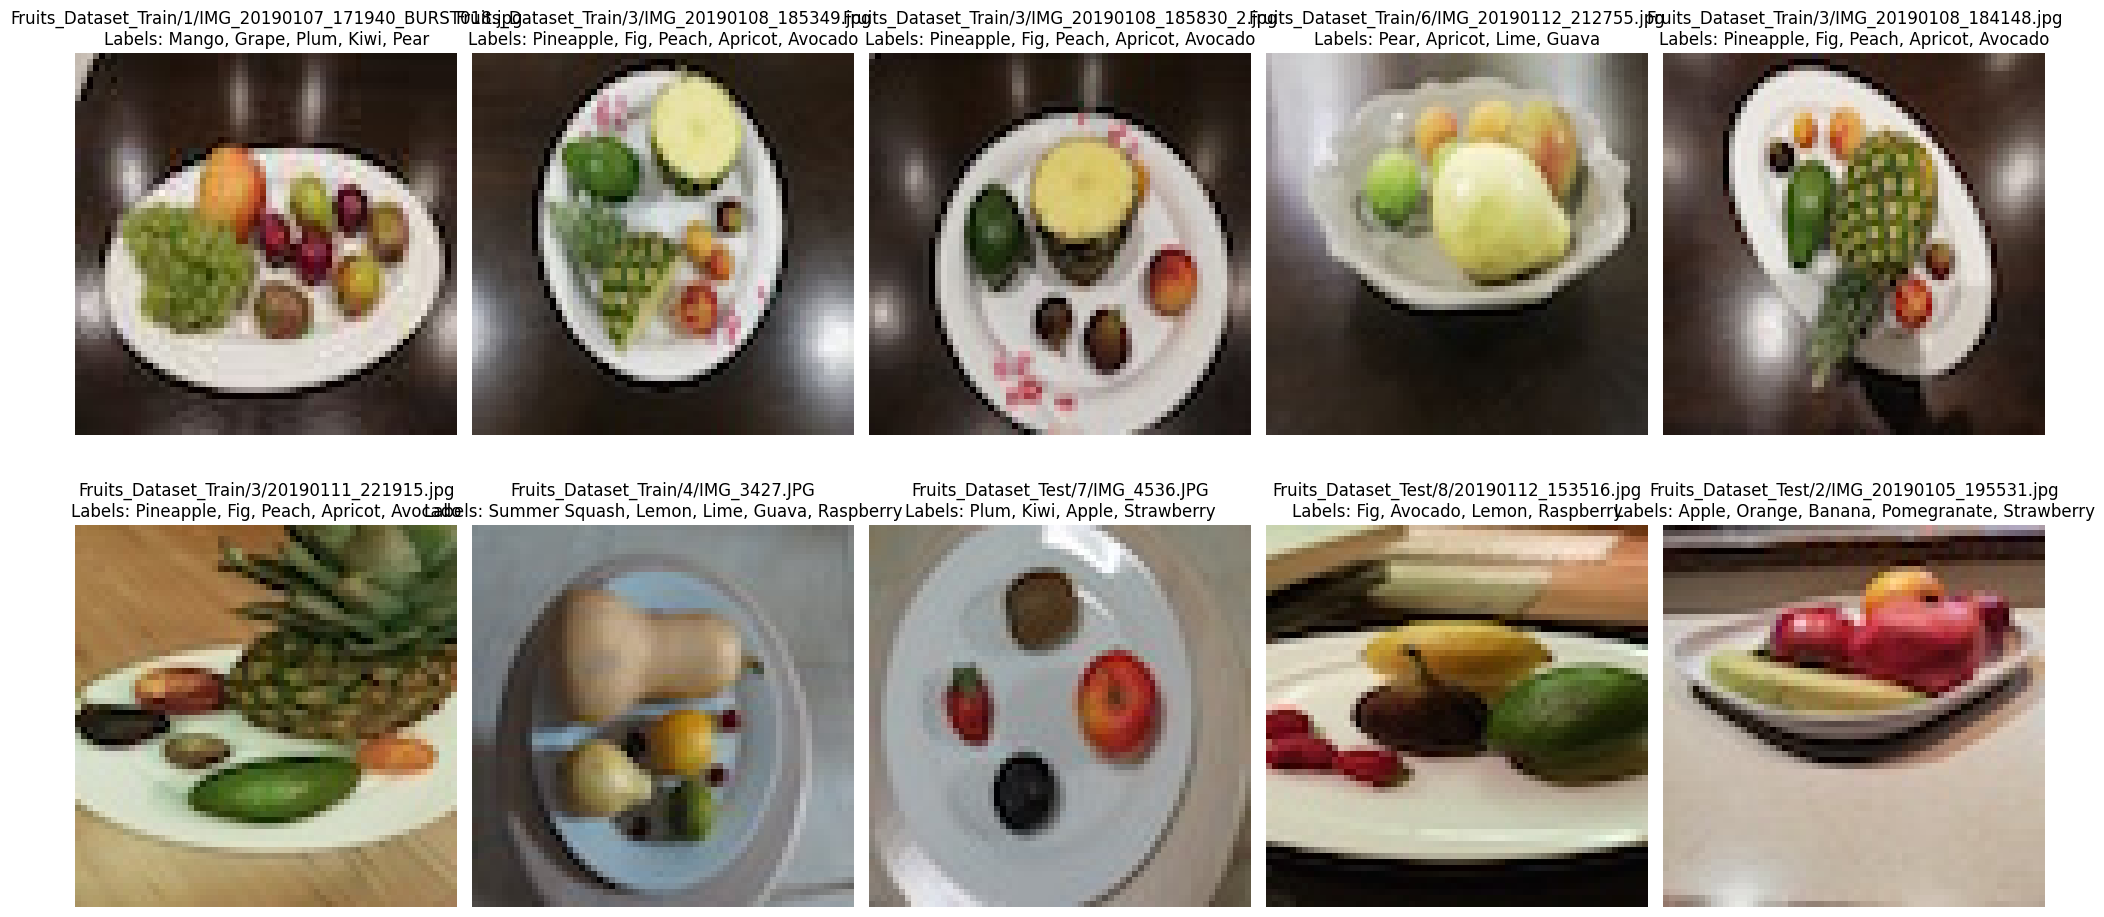

In [6]:
import matplotlib.pyplot as plt
import random
from PIL import Image
import os
import pandas as pd

all_image_files = []
# Create a set of filenames from all_labels_df for efficient lookup
labeled_filenames = set(all_labels_df['FileName'])

for folder_path in folders_to_check:
    if os.path.isdir(folder_path):
        for subfolder_name in os.listdir(folder_path):
            subfolder_path = os.path.join(folder_path, subfolder_name)
            if os.path.isdir(subfolder_path):
                for file_name in os.listdir(subfolder_path):
                    # Check if the file has a valid image extension and is in the labeled_filenames set
                    if any(file_name.lower().endswith(ext) for ext in image_extensions) and file_name in labeled_filenames:
                        all_image_files.append(os.path.join(subfolder_path, file_name))


# Shuffle the list of all image files
random.shuffle(all_image_files)

n_images_to_display = 10
plt.figure(figsize=(20, 10))

# Select the first n_images_to_display from the shuffled list
images_to_display = all_image_files[:n_images_to_display]

for i, image_path in enumerate(images_to_display):
    img = Image.open(image_path)
    ax = plt.subplot(2, 5, i + 1) # Arrange images in a 2x5 grid
    ax.imshow(img)

    # Get the filename from the image path
    file_name = os.path.basename(image_path)

    # Find the row in the labels DataFrame that matches the filename
    label_row = all_labels_df[all_labels_df['FileName'] == file_name]

    # Get the labels for this image
    labels = []
    if not label_row.empty:
        # Get the list of fruit columns (excluding 'FileName')
        fruit_columns = all_labels_df.columns.tolist()
        fruit_columns.remove('FileName')
        for fruit_col in fruit_columns:
            if label_row[fruit_col].iloc[0] == 1:
                labels.append(fruit_col)

    # Create the title with grandparent, parent, filename, and labels
    grandparent_folder = os.path.basename(os.path.dirname(os.path.dirname(image_path)))
    parent_folder = os.path.basename(os.path.dirname(image_path))
    title = f"{grandparent_folder}/{parent_folder}/{file_name}\nLabels: {', '.join(labels) if labels else 'None'}"

    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

Preprocess images and labels

In [7]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np # Import numpy

# Assuming 'all_image_files' and 'all_labels_df' are already loaded from previous steps

# Create a dictionary mapping filenames to labels
label_dict = {}
# Iterate through each row in the combined labels dataframe
for index, row in all_labels_df.iterrows():
    filename = row['FileName']
    # Get the list of fruit columns (excluding 'FileName')
    fruit_columns = all_labels_df.columns.tolist()
    fruit_columns.remove('FileName')
    # Get the labels for the current image as a list of 0s and 1s
    labels = row[fruit_columns].tolist()
    label_dict[filename] = labels

# Filter image files to include only those present in the label dictionary
image_files_with_labels = [img_path for img_path in all_image_files if os.path.basename(img_path) in label_dict]

# Create a list of corresponding labels in the same order as the image files
image_labels = [label_dict[os.path.basename(img_path)] for img_path in image_files_with_labels]

# Convert the list of labels to a NumPy array
image_labels = np.array(image_labels)

# Split the data into training and validation sets
train_paths, val_paths, train_labels, val_labels = train_test_split(
    image_files_with_labels, image_labels, test_size=0.2, random_state=42
)

print(f"Number of training images: {len(train_paths)}")
print(f"Number of validation images: {len(val_paths)}")
print(f"Shape of training labels: {train_labels.shape}")
print(f"Shape of validation labels: {val_labels.shape}")

Number of training images: 12196
Number of validation images: 3050
Shape of training labels: (12196, 20)
Shape of validation labels: (3050, 20)


Create model 1

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define image dimensions and number of classes
img_width, img_height = 128, 128  # You can adjust these based on your image sizes
num_classes = len(fruit_columns)  # Use the fruit_columns list from the label analysis step

# Build the classification model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='sigmoid') # Sigmoid for multi-label classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use binary_crossentropy for multi-label classification
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,307,220 (12.62 MB)

 Trainable params: 3,307,220 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

Train model

In [9]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
from PIL import Image

# Define batch size and epochs
batch_size = 32
epochs = 10  # You can adjust the number of epochs

# Redefine data generators to handle truncated images
def data_generator(image_paths, labels, batch_size):
    num_samples = len(image_paths)
    while True:
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        for start in range(0, num_samples, batch_size):
            end = min(start + batch_size, num_samples)
            batch_indices = indices[start:end]
            batch_paths = [image_paths[i] for i in batch_indices]
            batch_labels = labels[batch_indices]

            batch_images = []
            valid_batch_labels = []  # To store labels only for successfully loaded images

            for i, img_path in enumerate(batch_paths):
                try:
                    img = load_img(img_path, target_size=(img_height, img_width))
                    img_array = img_to_array(img)
                    img_array = img_array / 255.0  # Normalize pixel values
                    batch_images.append(img_array)
                    valid_batch_labels.append(batch_labels[i]) # Append label only if image is loaded
                except (OSError, Image.DecompressionBombError) as e:
                    print(f"Warning: Skipping corrupted image file {img_path} due to error: {e}")
                    continue  # Skip to the next image if there's an error

            # Only yield batch if there are valid images
            if batch_images:
                yield np.array(batch_images), np.array(valid_batch_labels).astype(np.float32)


# Recreate training and validation generators with the updated function
train_generator = data_generator(train_paths, train_labels, batch_size)
val_generator = data_generator(val_paths, val_labels, batch_size)

# Compile the model (re-compiling is fine)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Calculate steps per epoch
steps_per_epoch = len(train_paths) // batch_size
validation_steps = len(val_paths) // batch_size

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=epochs,
                    validation_data=val_generator,
                    validation_steps=validation_steps)

Epoch 1/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 17s 31ms/step - accuracy: 0.1134 - loss: 0.3211 - val_accuracy: 0.1424 - val_loss: 0.0858
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.1448 - loss: 0.0730 - val_accuracy: 0.1507 - val_loss: 0.1092
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.1649 - loss: 0.0543 - val_accuracy: 0.1398 - val_loss: 0.0561
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.1552 - loss: 0.0345 - val_accuracy: 0.1060 - val_loss: 0.0410
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.1504 - loss: 0.0269 - val_accuracy: 0.1539 - val_loss: 0.0469
Epoch 6/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.1725 - loss: 0.0249 - val_accuracy: 0.1017 - val_loss: 0.0379
Epoch 7/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.1771 - loss: 0.0269 - val_accuracy: 0.1673 - val_loss: 0.0407
Epoch 8/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.2220 - loss: 0.0205 - 

Evaluate the model

In [10]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(val_generator, steps=validation_steps)

print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.2322 - loss: 0.0399
Validation Loss: 0.04278772696852684
Validation Accuracy: 0.23028495907783508


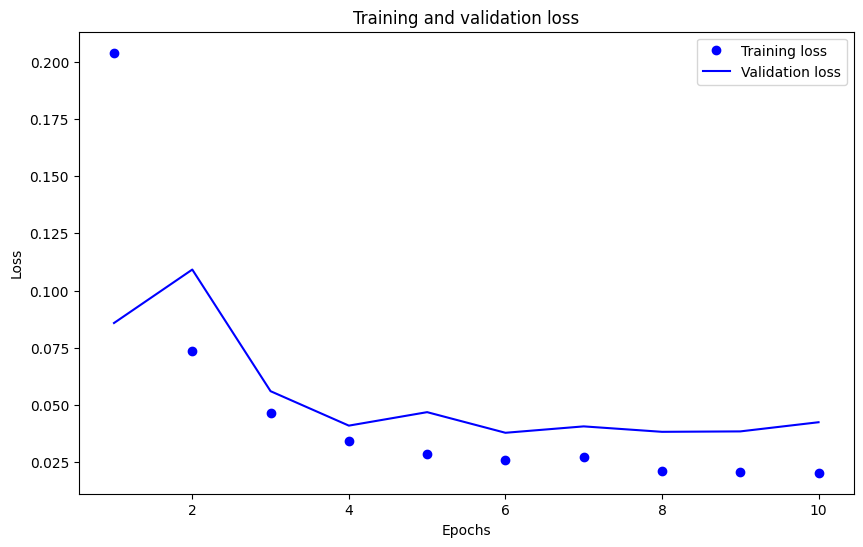

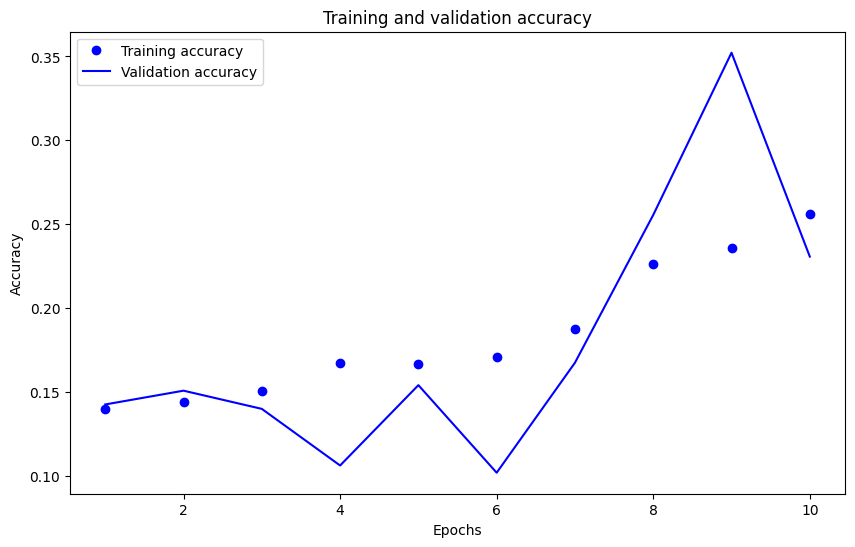

In [11]:
import matplotlib.pyplot as plt

# Get the training history
history_dict = history.history

# Plot training and validation loss
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.figure(figsize=(10, 6))
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Calculate metrics for each class

In [12]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

# Get predictions for the validation set
# We need to use the validation generator to get the images and then predict using the model.
# Since the generator yields batches, we'll iterate through the validation data using the generator
# to collect all predictions and true labels.

all_val_preds = []
all_val_labels = []

# Reset the validation generator to start from the beginning
val_generator_eval = data_generator(val_paths, val_labels, batch_size)


for i in range(validation_steps):
    images, labels = next(val_generator_eval)
    preds = model.predict(images)
    all_val_preds.append(preds)
    all_val_labels.append(labels)

# Concatenate predictions and labels from all batches
all_val_preds = np.concatenate(all_val_preds)
all_val_labels = np.concatenate(all_val_labels)

# Convert predicted probabilities to binary labels (0 or 1) using a threshold (e.g., 0.5)
predicted_labels = (all_val_preds > 0.5).astype(int)

# Calculate precision, recall, and F1-score for each class
# The 'average=None' argument ensures that metrics are calculated for each class individually
precision, recall, f1_score, _ = precision_recall_fscore_support(
    all_val_labels, predicted_labels, average=None
)

# Get the list of fruit names to associate with the metrics
# Assuming 'fruit_columns' is available from the label analysis step
fruit_names = fruit_columns

# Print the metrics for each class
print("Metrics per class:")
for i, fruit_name in enumerate(fruit_names):
    print(f"  {fruit_name}:")
    print(f"    Precision: {precision[i]:.4f}")
    print(f"    Recall: {recall[i]:.4f}")
    print(f"    F1-score: {f1_score[i]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━

Try inference

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


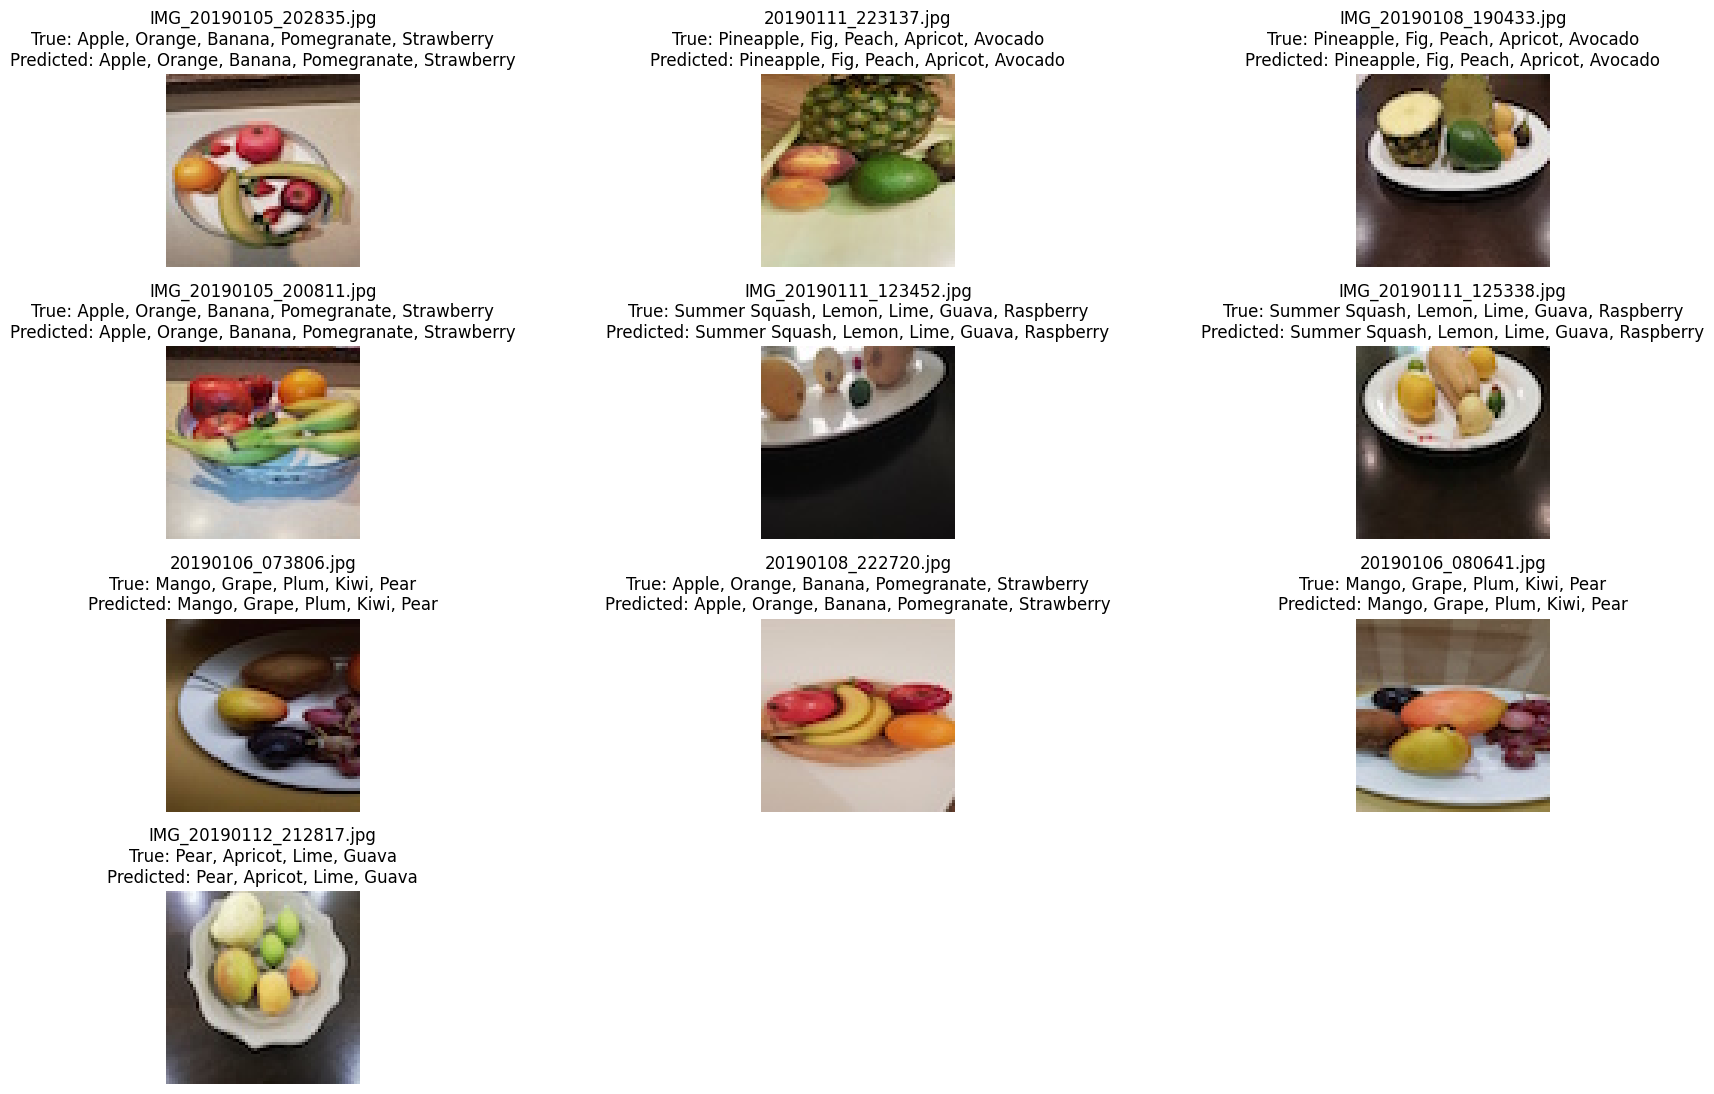

In [13]:
import matplotlib.pyplot as plt
import random
from PIL import Image
import numpy as np
import os

# Select a few random images from the validation set
num_inference_examples = 10
random_indices = random.sample(range(len(val_paths)), num_inference_examples)

inference_paths = [val_paths[i] for i in random_indices]
inference_true_labels = [val_labels[i] for i in random_indices]

plt.figure(figsize=(18, 12)) # Adjusted figure size

# Arrange images in a 2x3 grid (or similar based on num_inference_examples)
rows = (num_inference_examples + 2) // 3 # Calculate number of rows needed
cols = 3 # Number of columns

# Select the first num_inference_examples from the shuffled list
images_to_display = [all_image_files[i] for i in random_indices] # Use random_indices

for i, image_path in enumerate(images_to_display):
    # Load and preprocess the image
    img = Image.open(image_path)
    ax = plt.subplot(rows, cols, i + 1) # Arrange images in the calculated grid
    ax.imshow(img)
    ax.axis('off')

    # Get the filename from the image path
    file_name = os.path.basename(image_path)

    # Find the row in the labels DataFrame that matches the filename
    label_row = all_labels_df[all_labels_df['FileName'] == file_name]

    # Get the labels for this image
    labels = []
    if not label_row.empty:
        # Get the list of fruit columns (excluding 'FileName')
        fruit_columns = all_labels_df.columns.tolist()
        fruit_columns.remove('FileName')
        for fruit_col in fruit_columns:
            if label_row[fruit_col].iloc[0] == 1:
                labels.append(fruit_col)

    # Get the model's prediction
    # Need to load and preprocess the image again for prediction as it's a separate loop
    img_pred = load_img(image_path, target_size=(img_height, img_width))
    img_array_pred = img_to_array(img_pred)
    img_array_pred = img_array_pred / 255.0  # Normalize pixel values
    img_array_pred = np.expand_dims(img_array_pred, axis=0) # Add batch dimension
    predictions = model.predict(img_array_pred)
    predicted_labels = (predictions > 0.5).astype(int)[0]
    predicted_fruit_names = [fruit_names[j] for j, label in enumerate(predicted_labels) if label == 1]


    # Create the title with true and predicted labels, and filename
    title = f"{file_name}\nTrue: {', '.join(labels) if labels else 'None'}\nPredicted: {', '.join(predicted_fruit_names) if predicted_fruit_names else 'None'}"

    ax.set_title(title)


plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent titles overlapping figure title
plt.show()

Save model

In [14]:
# Save the model
model_save_path = "fruit_recognition_model.keras"
model.save(model_save_path)

print(f"Model saved to: {model_save_path}")

Model saved to: fruit_recognition_model.keras


New dataset for fine-tuning(https://huggingface.co/datasets/ethanjxu/fruit_images)

In [15]:
from datasets import load_dataset

ds = load_dataset("ethanjxu/fruit_images")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train-00000-of-00002.parquet:   0%|          | 0.00/423M [00:00<?, ?B/s]

train-00001-of-00002.parquet:   0%|          | 0.00/425M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/152M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/90580 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/15985 [00:00<?, ? examples/s]

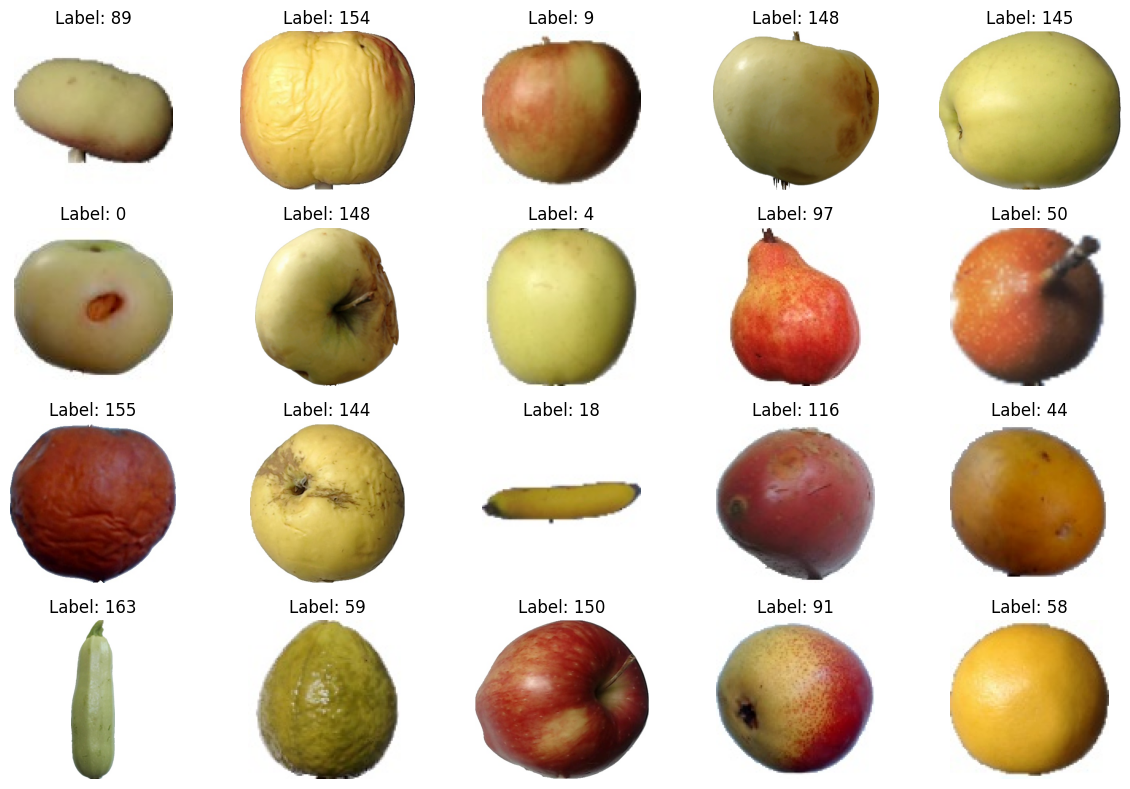

In [16]:
import matplotlib.pyplot as plt
from PIL import Image
import io

# Access the 'train' split of the dataset and take a small sample
sample_ds = ds['train'].select(range(20)) # Take the first 20 samples

plt.figure(figsize=(12, 8))

for i, example in enumerate(sample_ds):
    img = example['image']  # Directly access the image object
    label = example['label']

    try:
        ax = plt.subplot(4, 5, i + 1) # Arrange images in a 4x5 grid to accommodate 20 images
        ax.imshow(img)
        ax.set_title(f"Label: {label}")
        ax.axis('off')
    except Exception as e:
        print(f"Could not display image {i}: {e}")

plt.tight_layout()
plt.show()

In [18]:
# Get all unique labels from the training split
unique_labels = sorted(list(set(ds['train']['label'])))

# Get the feature information for the 'label' column
label_feature = ds['train'].features['label']

# Get the class names from the feature
class_names = label_feature.names

# Print the list of unique class labels with their names
print("List of all unique class labels with names:")
for label, name in zip(unique_labels, class_names):
    print(f"Label: {label}, Name: {name}")

List of all unique class labels with names:
Label: 0, Name: Apple 6
Label: 1, Name: Apple Braeburn 1
Label: 2, Name: Apple Crimson Snow 1
Label: 3, Name: Apple Golden 1
Label: 4, Name: Apple Golden 2
Label: 5, Name: Apple Golden 3
Label: 6, Name: Apple Granny Smith 1
Label: 7, Name: Apple Pink Lady 1
Label: 8, Name: Apple Red 1
Label: 9, Name: Apple Red 2
Label: 10, Name: Apple Red 3
Label: 11, Name: Apple Red Delicious 1
Label: 12, Name: Apple Red Yellow 1
Label: 13, Name: Apple Red Yellow 2
Label: 14, Name: Apple hit 1
Label: 15, Name: Apricot 1
Label: 16, Name: Avocado 1
Label: 17, Name: Avocado ripe 1
Label: 18, Name: Banana 1
Label: 19, Name: Banana Lady Finger 1
Label: 20, Name: Banana Red 1
Label: 21, Name: Beetroot 1
Label: 22, Name: Blueberry 1
Label: 23, Name: Cabbage white 1
Label: 24, Name: Cactus fruit 1
Label: 25, Name: Cantaloupe 1
Label: 26, Name: Cantaloupe 2
Label: 27, Name: Carambula 1
Label: 28, Name: Carrot 1
Label: 29, Name: Cauliflower 1
Label: 30, Name: Cherry 1

In [19]:
print(ds)

print("\nSample from the training split:")
print(ds['train'][0])

print("\nSample from the test split:")
print(ds['test'][0])

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 90580
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 15985
    })
})

Sample from the training split:
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=100x100 at 0x7C9ED864E210>, 'label': 89}

Sample from the test split:
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=100x100 at 0x7C9ED8683B50>, 'label': 7}


### Preprocess the new dataset

In [20]:
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np

# Define the target image size (should match your model's input size)
target_img_width, target_img_height = 128, 128

def preprocess_image(example):
    img = example['image']
    # Resize image
    img = img.resize((target_img_width, target_img_height))
    # Convert to array and normalize
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    example['image'] = img_array
    return example

# Apply preprocessing to the dataset
processed_ds = ds.map(preprocess_image)

# Convert labels to one-hot encoding if your model requires it (check your model's output layer)
# Assuming your previous model was trained on multi-label with sigmoid output,
# we need to convert single integer labels to a one-hot encoded format.
# First, determine the total number of classes in the new dataset
num_new_classes = len(ds['train'].features['label'].names)

def one_hot_encode_labels(example):
    label = example['label']
    # Create a one-hot encoded vector
    one_hot_label = np.zeros(num_new_classes, dtype=np.float32)
    one_hot_label[label] = 1.0
    example['label'] = one_hot_label
    return example

# Apply one-hot encoding to the dataset if needed
# Check if the number of classes in the new dataset matches the old model's output layer
# If not, you might need to adjust the model's output layer later
if num_new_classes != num_classes: # num_classes is from the previous dataset analysis
    print(f"Warning: Number of classes in new dataset ({num_new_classes}) does not match previous model's output ({num_classes}). You may need to modify the model.")
    # For now, we'll proceed with one-hot encoding based on the new dataset's classes
    processed_ds = processed_ds.map(one_hot_encode_labels)
    print("Labels in the new dataset have been one-hot encoded based on the new number of classes.")
else:
     # If the number of classes is the same, ensure labels are in the correct format (e.g., float32)
     def convert_label_type(example):
         example['label'] = example['label'].astype(np.float32)
         return example
     processed_ds = processed_ds.map(convert_label_type)
     print("Number of classes matches the previous model. Labels converted to float32.")


print("Preprocessing complete.")
print(processed_ds)

Map:   0%|          | 0/90580 [00:00<?, ? examples/s]

Map:   0%|          | 0/15985 [00:00<?, ? examples/s]

Map:   0%|          | 0/90580 [00:00<?, ? examples/s]

Map:   0%|          | 0/15985 [00:00<?, ? examples/s]

Labels in the new dataset have been one-hot encoded based on the new number of classes.
Preprocessing complete.
DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 90580
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 15985
    })
})


### Prepare data generators

In [23]:
import tensorflow as tf

# Define batch size (can be the same as during initial training)
batch_size = 32

# Create TensorFlow datasets
train_dataset = processed_ds['train'].to_tf_dataset(
    columns=['image'],
    label_cols=['label'],
    batch_size=batch_size,
    shuffle=True
)

val_dataset = processed_ds['test'].to_tf_dataset(
    columns=['image'],
    label_cols=['label'],
    batch_size=batch_size
)

print("Data generators prepared.")

/usr/local/lib/python3.11/dist-packages/datasets/arrow_dataset.py:403: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


Data generators prepared.


### Modify the existing model for fine-tuning

In [21]:
from tensorflow.keras.models import load_model
import tensorflow as tf

# Load the previously saved model
# Make sure the path 'fruit_recognition_model.keras' is correct
try:
    base_model = load_model('fruit_recognition_model.keras')
    print("Previous model loaded successfully.")
except Exception as e:
    print(f"Error loading the previous model: {e}")
    print("Please ensure 'fruit_recognition_model.keras' exists and the path is correct.")
    # Exit or handle the error appropriately if the model cannot be loaded


# Get the number of classes from the new dataset
num_new_classes = len(ds['train'].features['label'].names)

# Check if the number of classes in the new dataset matches the original model's output layer
# If not, we need to replace the output layer
if base_model.layers[-1].units != num_new_classes:
    print(f"Modifying the output layer to match the new number of classes ({num_new_classes}).")

    # Remove the original output layer
    base_model.pop()

    # Add a new dense layer for the new number of classes with sigmoid activation
    # Use sigmoid for multi-label classification (assuming the new dataset is also multi-label)
    new_output_layer = tf.keras.layers.Dense(num_new_classes, activation='sigmoid')
    base_model.add(new_output_layer)

    print("Output layer modified.")
else:
    print("Number of classes in the new dataset matches the original model's output layer. No modification needed for the output layer.")


# Freeze the layers of the base model (excluding the new output layer)
# This prevents their weights from being updated during fine-tuning
for layer in base_model.layers[:-1]: # Freeze all layers except the last one
    layer.trainable = False

# Re-compile the model after modifying layers and freezing
# Use the same optimizer and loss function as before, but you can adjust the learning rate
base_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # Use a lower learning rate for fine-tuning
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

base_model.summary()
print("Model prepared for fine-tuning.")

Previous model loaded successfully.
Modifying the output layer to match the new number of classes (165).
Output layer modified.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 165)            │        21,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,325,925 (12.69 MB)

 Trainable params: 21,285 (83.14 KB)

 Non-trainable params: 3,304,640 (12.61 MB)

Model prepared for fine-tuning.


### Fine-tune the model

In [ ]:
# Define the number of epochs for fine-tuning
fine_tune_epochs = 5 # You can adjust this number

# Fine-tune the model
history_fine_tune = base_model.fit(train_dataset,
                                   epochs=fine_tune_epochs,
                                   validation_data=val_dataset)

print("Fine-tuning complete.")

Epoch 1/5
  29/2831 ━━━━━━━━━━━━━━━━━━━━ 2:40:14 3s/step - accuracy: 0.0067 - loss: 2.9333